In a previous [post](http://www.danvatterott.com/blog/2016/04/29/an-introduction-to-neural-networks-part-1/), I described how to do [backpropogation](https://en.wikipedia.org/wiki/Backpropagation) with a 2-layer [neural network](https://en.wikipedia.org/wiki/Artificial_neural_network). I've written this post assuming some familiarity with the previous post. 

When first created, 2-layer neural networks [brought about quite a bit of excitement](https://en.wikipedia.org/wiki/Perceptron), but this excitement quickly dissipated when researchers realized that 2-layer [neural networks could only solve a limited set of problems](https://en.wikipedia.org/wiki/Perceptrons_%28book%29). 

Researchers knew that adding an extra layer to the neural networks enabled neural networks to solve much more complex problems, but they didn't know how to train these more complex networks.

In the previous post, I described "backpropogation," but this wasn't the portion of backpropogation that really changed the history of neural networks. What really changed neural networks is backpropogation with an extra layer. This extra layer enabled researchers to train more complex networks. The extra layer(s) is(are) called the *hidden layer(s)*. In this post, I will describe backpropogation with a hidden layer. 

To describe backpropogation with a hidden layer, I will demonstrate how neural networks can solve the [XOR problem](https://en.wikipedia.org/wiki/Exclusive_or).

In this example of the XOR problem there are four items. Each item is defined by two values. If these two values are the same, then the item belongs to one group (blue here). If the two values are different, then the item belongs to another group (red here).

Below, I have depicted the XOR problem. The goal is to find a model that can distinguish between the blue and red groups based on an item's values. 

This code is also available as a jupyter notebook on [my github](https://github.com/dvatterott/jupyter_notebooks). 

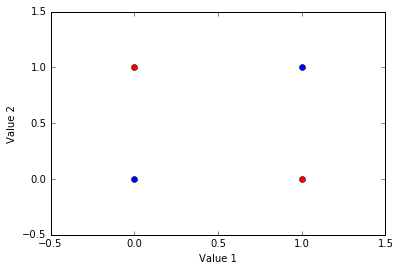

In [1]:
import numpy as np #import important libraries. 
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

plt.plot([0,1],[0,1],'bo')
plt.plot([0,1],[1,0],'ro')
plt.ylabel('Value 2')
plt.xlabel('Value 1')
plt.axis([-0.5,1.5,-0.5,1.5]);

Again, each item has two values. An item's first value is represented on the x-axis. An items second value is represented on the y-axis. The red items belong to one category and the blue items belong to another.

This is a non-linear problem because no linear function can segregate the groups. For instance, a horizontal line could segregate the upper and lower items and a vertical line could segregate the left and right items, but no single linear function can segregate the red and blue items. 

We need a non-linear function to seperate the groups, and neural networks can emulate a non-linear function that segregates them. 

While this problem may seem relatively simple, it gave the initial neural networks quite a hard time. In fact, this is the problem that depleted much of the original enthusiasm for neural networks.

Neural networks can easily solve this problem, but they require an extra layer. Below I depict a network with an extra layer (a 3-layer network). To depict the network, I use a repository available on my [github](https://github.com/dvatterott/visualise_neural_network). 

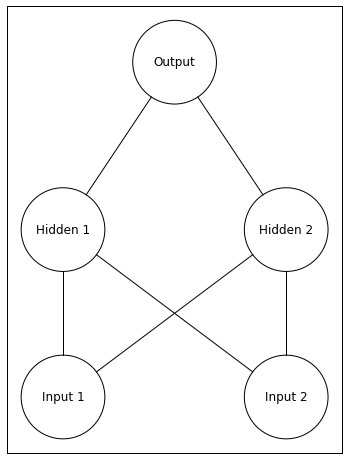

In [2]:
from visualise_neural_network import NeuralNetwork

network = NeuralNetwork() #create neural network object
network.add_layer(2,['Input 1','Input 2']) #input layer with names
network.add_layer(2,['Hidden 1','Hidden 2']) #hidden layer with names
network.add_layer(1,['Output']) #output layer with name
network.draw()

Notice that this network now has 5 total neurons. The two units at the bottom are the *input layer*. The activity of input units is the value of the inputs (same as the inputs in my previous post). The two units in the middle are the *hidden layer*. The activity of hidden units are calculated in the same manner as the output units from my previous post. The unit at the top is the *output layer*. The activity of this unit is found in the same manner as in my previous post, but the activity of the hidden units replaces the input units.  

Thus, when the neural network makes its guess, the only difference is we have to compute an extra layer's activity. 

The goal of this network is for the output unit to have an activity of 0 when presented with an item from the blue group (inputs are same) and to have an activity of 1 when presented with an item from the red group (inputs are different).

One additional aspect of neural networks that I haven't discussed is each non-input unit can have a *bias*. You can think about bias as a propensity for the unit to become active or not to become active. For instance, a unit with a postitive bias is more likely to be active than a unit with no bias. 

I will implement bias as an extra line feeding into each unit. The weight of this line is the bias, and the bias line is always active, meaning this bias is always present. 

Below, I seed this 3-layer neural network with a random set of weights.

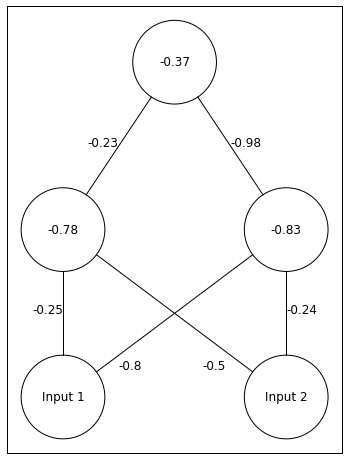

In [3]:
np.random.seed(seed=10) #seed random number generator for reproducibility

Weights_2 = np.random.rand(1,3)-0.5*2 #connections between hidden and output
Weights_1 = np.random.rand(2,3)-0.5*2 #connections between input and hidden

Weight_Dict = {'Weights_1':Weights_1,'Weights_2':Weights_2} #place weights in a dictionary

Train_Set = [[1.0,1.0],[0.0,0.0],[0.0,1.0],[1.0,0.0]] #train set

network = NeuralNetwork()
network.add_layer(2,['Input 1','Input 2'],
                  [[round(x,2) for x in Weight_Dict['Weights_1'][0][:2]],
                   [round(x,2) for x in Weight_Dict['Weights_1'][1][:2]]])
#add input layer with names and weights leaving the input neurons
network.add_layer(2,[round(Weight_Dict['Weights_1'][0][2],2),round(Weight_Dict['Weights_1'][1][2],2)],
                  [round(x,2) for x in Weight_Dict['Weights_2'][0][:2]])
#add hidden layer with names (each units' bias) and weights leaving the hidden units
network.add_layer(1,[round(Weight_Dict['Weights_2'][0][2],2)])
#add output layer with name (the output unit's bias)
network.draw()

Above we have out network. The depiction of $Weight_{Input_{1}\to.Hidden_{2}}$ and $Weight_{Input_{2}\to.Hidden_{1}}$ are confusing. -0.8 belongs to $Weight_{Input_{1}\to.Hidden_{2}}$. -0.5 belongs to $Weight_{Input_{2}\to.Hidden_{1}}$.  

Lets go through one example of our network receiving an input and making a guess. Lets say the input is [0 1].
This means $Input_{1} = 0$ and $Input_{2} = 1$. The correct answer in this case is 1. 

First, we have to calculate $Hidden _{1}$'s input. Remember we can write input as

$net = \displaystyle\sum_{i=1}^{Inputs}Input_i * Weight_i$

with the a bias we can rewrite it as

$net = Bias + \displaystyle\sum_{i=1}^{Inputs}Input_i * Weight_i$

Specifically for $Hidden_{1}$

$net_{Hidden_{1}} = -0.78 + -0.25*0 + -0.5*1 = -1.28$

Remember the first term in the equation above is the bias term. Lets see what this looks like in code. 

In [4]:
Input = np.array([0,1])
net_Hidden = np.dot(np.append(Input,1.0),Weights_1.T) #append the bias input
print net_Hidden

[-1.27669634 -1.07035845]


Note that by using np.dot, I can calculate both hidden unit's input in a single line of code. 

Next, we have to find the activity of units in the hidden layer. 

I will translate input into activity with a logistic function, as I did in the previous post. 

$Logistic = \frac{1}{1+e^{-x}}$

Lets see what this looks like in code.

In [5]:
def logistic(x): #each neuron has a logistic activation function
    return 1.0/(1+np.exp(-x))

Hidden_Units = logistic(net_Hidden)
print Hidden_Units

[ 0.2181131   0.25533492]


So far so good, the logistic function has transformed the negative inputs into values near 0. 

Now we have to compute the output unit's acitivity. 

$net_{Output} = Bias + Hidden_{1}*Weight_{Hidden_{1}\to.Output} + Hidden_{2}*Weight_{Hidden_{2}\to.Output}$

plugging in the numbers

$net_{Output} = -0.37 + 0.22*-0.23 + 0.26*-0.98 = -0.67$

Now the code for computing $net_{Output}$ and the Output unit's activity. 

In [6]:
net_Output = np.dot(np.append(Hidden_Units,1.0),Weights_2.T)
print 'net_Output'
print net_Output
Output = logistic(net_Output)
print 'Output'
print Output

net_Output
[-0.66626595]
Output
[ 0.33933346]


Okay, thats the network's guess for one input.... no where near the correct answer (1). Let's look at what the network predicts for the other input patterns. Below I create a feedfoward, 2-layer neural network and plot the neural nets' guesses to the four input patterns. 

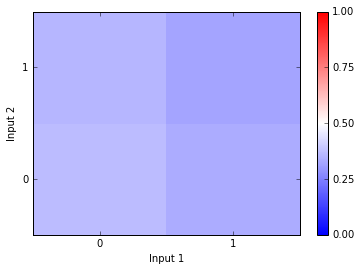

In [7]:
def layer_InputOutput(Inputs,Weights): #find a layers input and activity
    Inputs_with_bias = np.append(Inputs,1.0) #input 1 for each unit's bias
    return logistic(np.dot(Inputs_with_bias,Weights.T))

def neural_net(Input,Weights_1,Weights_2,Training=False): #this function creates and runs the neural net    
        
    target = 1 #set target value
    if np.array(Input[0])==np.array([Input[1]]): target = 0 #change target value if needed
    
    #forward pass
    Hidden_Units = layer_InputOutput(Input,Weights_1) #find hidden unit activity
    Output = layer_InputOutput(Hidden_Units,Weights_2) #find Output layer actiity
        
    return {'output':Output,'target':target,'input':Input} #record trial output

Train_Set = [[1.0,1.0],[0.0,1.0],[1.0,0.0],[0.0,0.0]] #the four input patterns
tempdict = {'output':[],'target':[],'input':[]} #data dictionary
temp = [neural_net(Input,Weights_1,Weights_2) for Input in Train_Set] #get the data
[tempdict[key].append([temp[x][key] for x in range(len(temp))]) for key in tempdict] #combine all the output dictionaries

plotter = np.ones((2,2))*np.reshape(np.array(tempdict['output']),(2,2))
plt.pcolor(plotter,vmin=0,vmax=1,cmap=plt.cm.bwr)
plt.colorbar(ticks=[0,0.25,0.5,0.75,1]);
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xticks([0.5,1.5], ['0','1'])
plt.yticks([0.5,1.5], ['0','1']);

In the plot above, I have Input 1 on the x-axis and Input 2 on the y-axis. So if the Input is [0,0], the network produces the activity depicted in the lower left square. If the Input is [1,0], the network produces the activity depicted in the lower right square. If the network produces an output of 0, then the square will be blue. If the network produces an output of 1, then the square will be red. As you can see, the network produces all output between 0.25 and 0.5... no where near the correct answers.

So how do we update the weights in order to reduce the error between our guess and the correct answer?

First, we will do backpropogation between the output and hidden layers. This is exactly the same as backpropogation in the previous post. 

In the previous post I described how our goal was to decrease error by changing the weights between units. This is the equation we used to describe changes in error with changes in the weights. The equation below expresses changes in error with changes to weights between the $Hidden_{1}$ and the Output unit. 

$\frac{\partial Error}{\partial Weight_{Hidden_{1}\to.Output}} = \frac{\partial Error}{\partial Output} * \frac{\partial Output}{\partial net_{Output}} * \frac{\partial net_{Output}}{\partial Weight_{Hidden_{1}\to.Output}}$

$
\begin{multline}
\frac{\partial Error}{\partial Weight_{Hidden_{1}\to.Output}} = -(target-Output) * Output(1-Output) * Hidden_{1} \\= -(1-0.34) * 0.34(1-0.34) * 0.22 = -0.03
\end{multline}
$

Now multiply this weight adjustment by the learning rate.

$\Delta Weight_{Input_{1}\to.Output} = \alpha * \frac{\partial Error}{\partial Weight_{Input_{1}\to.Output}}$

Finally, we apply the weight adjustment to $Weight_{Hidden_{1}\to.Output}$.

$Weight_{Hidden_{1}\to.Output}^{\prime} = Weight_{Hidden_{1}\to.Output} - 0.5 * -0.03 = -0.23 - 0.5 * -0.03 = -0.21$

Now lets do the same thing, but for both the weights and in the code.

In [8]:
alpha = 0.5 #learning rate
target = 1 #target outpu

error = target - Output #amount of error
delta_out = np.atleast_2d(error*(Output*(1-Output))) #first two terms of error by weight derivative

Hidden_Units = np.append(Hidden_Units,1.0) #add an input of 1 for the bias
print Weights_2 + alpha*np.outer(delta_out,Hidden_Units) #apply weight change

[[-0.21252673 -0.96033892 -0.29229558]]


The hidden layer changes things when we do backpropogation. Above, we computed the new weights using the output unit's error. Now, we want to find how adjusting a weight changes the error, but this weight connects an input to the hidden layer rather than connecting to the output layer. This means we have to propogate the error backwards to the hidden layer. 

We will describe backpropogation for the line connecting $Input_{1}$ and $Hidden_{1}$ as 

$\frac{\partial Error}{\partial Weight_{Input_{1}\to.Hidden_{1}}} = \frac{\partial Error}{\partial Hidden_{1}} * \frac{\partial Hidden_{1}}{\partial net_{Hidden_{1}}} * \frac{\partial net_{Hidden_{1}}}{\partial Weight_{Input_{1}\to.Hidden_{1}}}$

Pretty similar. We just replaced Output with $Hidden_{1}$. The interpretation (starting with the final term and moving left) is that changing the $Weight_{Input_{1}\to.Hidden_{1}}$ changes $Hidden_{1}$'s input. Changing $Hidden_{1}$'s input changes $Hidden_{1}$'s activity. Changing $Hidden_{1}$'s activity changes the error. This last assertion (the first term) is where things get complicated. Lets take a closer look at this first term

$\frac{\partial Error}{\partial Hidden_{1}} = \frac{\partial Error}{\partial net_{Output}} * \frac{\partial net_{Output}}{\partial Hidden_{1}}$

Changing $Hidden_{1}$'s activity changes changes the input to the Output unit. Changing the output unit's input changes the error. hmmmm still not quite there yet. Lets look at how changes to the output unit's input changes the error. 

$\frac{\partial Error}{\partial net_{Output}} = \frac{\partial Error}{\partial Output} * \frac{\partial Output}{\partial net_{Output}}$

You can probably see where this is going. Changing the output unit's input changes the output unit's activity. Changing the output unit's activity changes error. There we go.

Okay, this got a bit heavy, but here comes some good news. Compare the two terms of the equation above to the first two terms of our original backpropogation equation. They're the same! Now lets look at $\frac{\partial net_{Output}}{\partial Hidden_{1}}$ (the second term from the first equation after our new backpropogation equation).

$\frac{\partial net_{Output}}{\partial Hidden_{1}} = Weight_{Hidden_{1}\to Output}$

Again, I am glossing over how to derive these partial derivatives. For a more complete explantion, I recommend [Chapter 8 of Rumelhart and McClelland's PDP book](http://www-psych.stanford.edu/~jlm/papers/PDP/Volume%201/Chap8_PDP86.pdf). Nonetheless, this means we can take the output of our function *delta_output* multiplied by $Weight_{Hidden_{1}\to Output}$ and we have the first term of our backpropogation equation! We want $Weight_{Hidden_{1}\to Output}$ to be the weight used in the forward pass. Not the updated weight.  

The second two terms from our backpropogation equation are the same as in our original backpropogation equation.

$\frac{\partial Hidden_{1}}{\partial net_{Hidden_{1}}} = Hidden_{1}(1-Hidden_{1})$ - this is specific to logistic activation functions.

and

$\frac{\partial net_{Hidden_{1}}}{\partial Weight_{1}} = Input_{1}$

Lets try and write this out. 

$\frac{\partial Error}{\partial Weight_{Input_{1}\to.Hidden_{1}}} = -(target-Output) * Output(1-Output) * Weight_{Hidden_{1}\to Output} * Hidden_{1}(1-Hidden_{1}) * Input_{1}$

It's not short, but its doable. Let's plug in the numbers.

$\frac{\partial Error}{\partial Weight_{Input_{1}\to.Hidden_{1}}} = -(1-0.34)*0.34(1-0.34)*-0.23*0.22(1-0.22)*0 = 0$

Not too bad. Now lets see the code.

In [9]:
delta_hidden = delta_out.dot(Weights_2)*(Hidden_Units*(1-Hidden_Units)) #find delta portion of weight update
                       
delta_hidden = np.delete(delta_hidden,2) #remove the bias input
print Weights_1 + alpha*np.outer(delta_hidden,np.append(Input,1.0)) #append bias input and multiply input by delta portion 

[[-0.25119612 -0.50149299 -0.77809147]
 [-0.80193714 -0.23946929 -0.84467792]]


Alright! Lets implement all of this into a single model and train the model on the XOR problem. Below I create a neural network that includes both a forward pass and an optional backpropogation pass.

In [10]:
def neural_net(Input,Weights_1,Weights_2,Training=False): #this function creates and runs the neural net    
        
    target = 1 #set target value
    if np.array(Input[0])==np.array([Input[1]]): target = 0 #change target value if needed
    
    #forward pass
    Hidden_Units = layer_InputOutput(Input,Weights_1) #find hidden unit activity
    Output = layer_InputOutput(Hidden_Units,Weights_2) #find Output layer actiity
        
    if Training == True:
        alpha = 0.5 #learning rate
        
        Weights_2 = np.atleast_2d(Weights_2) #make sure this weight vector is 2d.
        
        error = target - Output #error
        delta_out = np.atleast_2d(error*(Output*(1-Output))) #delta between output and hidden
        
        Hidden_Units = np.append(Hidden_Units,1.0) #append an input for the bias
        delta_hidden = delta_out.dot(np.atleast_2d(Weights_2))*(Hidden_Units*(1-Hidden_Units)) #delta between hidden and input
               
        Weights_2 += alpha*np.outer(delta_out,Hidden_Units) #update weights
        
        delta_hidden = np.delete(delta_hidden,2) #remove bias activity
        Weights_1 += alpha*np.outer(delta_hidden,np.append(Input,1.0))  #update weights
            
    if Training == False: 
        return {'output':Output,'target':target,'input':Input} #record trial output
    elif Training == True:
        return {'Weights_1':Weights_1,'Weights_2':Weights_2,'target':target,'output':Output,'error':error}

Okay, thats the network. Below, I train the network until its answers are very close to the correct answer. 

In [11]:
from random import choice
np.random.seed(seed=10) #seed random number generator for reproducibility

Weights_2 = np.random.rand(1,3)-0.5*2 #connections between hidden and output
Weights_1 = np.random.rand(2,3)-0.5*2 #connections between input and hidden
                      
Weight_Dict = {'Weights_1':Weights_1,'Weights_2':Weights_2}

Train_Set = [[1.0,1.0],[0.0,0.0],[0.0,1.0],[1.0,0.0]] #train set

Error = []
while True: #train the neural net
    Train_Dict = neural_net(choice(Train_Set),Weight_Dict['Weights_1'],Weight_Dict['Weights_2'],Training=True)
    
    Error.append(abs(Train_Dict['error']))
    if len(Error) > 6 and np.mean(Error[-10:]) < 0.025: break #tell the code to stop iterating when recent mean error is small

Lets see how error changed across training

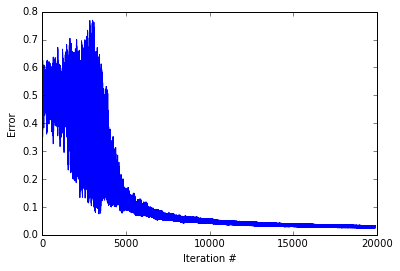

In [12]:
Error_vec = np.array(Error)[:,0]
plt.plot(Error_vec)
plt.ylabel('Error')
plt.xlabel('Iteration #');

Really cool. The network start with volatile error - sometimes being nearly correct ans sometimes being completely incorrect. Then After about 5000 iterations, the network starts down the slow path of perfecting an answer scheme. Below, I create a plot depicting the networks' activity for the different input patterns. 

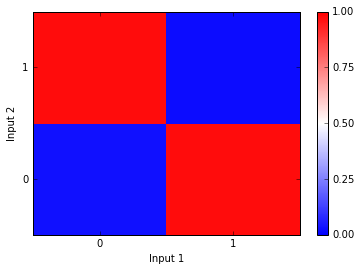

In [13]:
Weights_1 = Weight_Dict['Weights_1']
Weights_2 = Weight_Dict['Weights_2']

Train_Set = [[1.0,1.0],[0.0,1.0],[1.0,0.0],[0.0,0.0]] #train set

tempdict = {'output':[],'target':[],'input':[]} #data dictionary
temp = [neural_net(Input,Weights_1,Weights_2) for Input in Train_Set] #get the data
[tempdict[key].append([temp[x][key] for x in range(len(temp))]) for key in tempdict] #combine all the output dictionaries

plotter = np.ones((2,2))*np.reshape(np.array(tempdict['output']),(2,2))
plt.pcolor(plotter,vmin=0,vmax=1,cmap=plt.cm.bwr)
plt.colorbar(ticks=[0,0.25,0.5,0.75,1]);
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xticks([0.5,1.5], ['0','1'])
plt.yticks([0.5,1.5], ['0','1']);

Again, the Input 1 value is on the x-axis and the Input 2 value is on the y-axis. As you can see, the network guesses 1 when the inputs are different and it guesses 0 when the inputs are the same. Perfect! Below I depict the network with these correct weights.

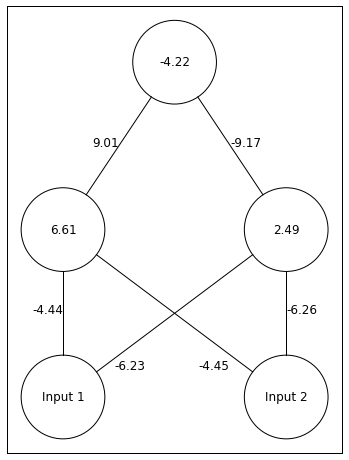

In [14]:
Weight_Dict = {'Weights_1':Weights_1,'Weights_2':Weights_2}

network = NeuralNetwork()
network.add_layer(2,['Input 1','Input 2'],
                  [[round(x,2) for x in Weight_Dict['Weights_1'][0][:2]],
                   [round(x,2) for x in Weight_Dict['Weights_1'][1][:2]]])
network.add_layer(2,[round(Weight_Dict['Weights_1'][0][2],2),round(Weight_Dict['Weights_1'][1][2],2)],
                  [round(x,2) for x in Weight_Dict['Weights_2'][:2][0]])
network.add_layer(1,[round(Weight_Dict['Weights_2'][0][2],2)])
network.draw()

The network finds a pretty cool solution. Both hidden units are relatively active, but one hidden unit sends a strong postitive signal and the other sends a strong negative signal. The output unit has a negative bias, so if neither input is on, it will have an activity around 0. If both Input units are on, then the hidden unit that sends a postitive signal will be inhibited, and the output unit will have activity near 0. Otherwise, the hidden unit with a positive signal gives the output unit an acitivty near 1. 

This is all well and good, but if you try to train this network with random weights you might find that it produces an incorrect set of weights sometimes. This is because the network runs into a [local minima](https://en.wikipedia.org/wiki/Maxima_and_minima). A local minima is an instance when any change in the weights would increase the error, so the network is left with a sub-optimal set of weights. 

Below I hand-pick of set of weights that produce a local optima. 

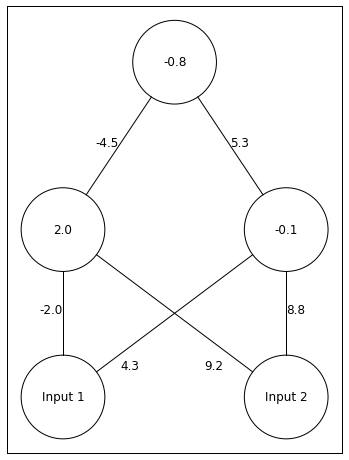

In [15]:
Weights_2 = np.array([-4.5,5.3,-0.8]) #connections between hidden and output
Weights_1 = np.array([[-2.0,9.2,2.0],
                     [4.3,8.8,-0.1]])#connections between input and hidden

Weight_Dict = {'Weights_1':Weights_1,'Weights_2':Weights_2}

network = NeuralNetwork()
network.add_layer(2,['Input 1','Input 2'],
                  [[round(x,2) for x in Weight_Dict['Weights_1'][0][:2]],
                   [round(x,2) for x in Weight_Dict['Weights_1'][1][:2]]])
network.add_layer(2,[round(Weight_Dict['Weights_1'][0][2],2),round(Weight_Dict['Weights_1'][1][2],2)],
                  [round(x,2) for x in Weight_Dict['Weights_2'][:2]])
network.add_layer(1,[round(Weight_Dict['Weights_2'][2],2)])
network.draw()

Using these weights as the start of the training set, lets see what the network will do with training. 

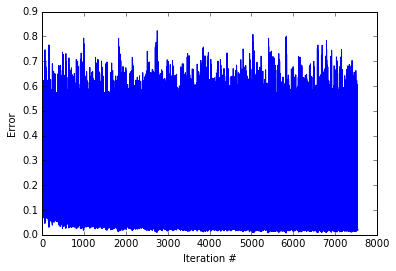

In [16]:
Train_Set = [[1.0,1.0],[0.0,0.0],[0.0,1.0],[1.0,0.0]] #train set

Error = []
while True:
    Train_Dict = neural_net(choice(Train_Set),Weight_Dict['Weights_1'],Weight_Dict['Weights_2'],Training=True)
    
    Error.append(abs(Train_Dict['error']))
    if len(Error) > 6 and np.mean(Error[-10:]) < 0.025: break
        
Error_vec = np.array(Error)[:]
plt.plot(Error_vec)
plt.ylabel('Error')
plt.xlabel('Iteration #');

As you can see the network never reduces error. Let's see how the network answers to the different input patterns.

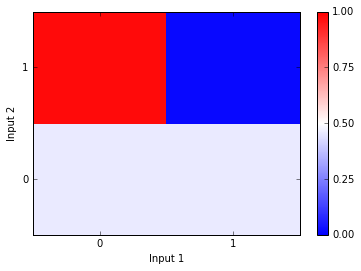

In [17]:
Weights_1 = Weight_Dict['Weights_1']
Weights_2 = Weight_Dict['Weights_2']

Train_Set = [[1.0,1.0],[0.0,1.0],[1.0,0.0],[0.0,0.0]] #train set

tempdict = {'output':[],'target':[],'input':[]} #data dictionary
temp = [neural_net(Input,Weights_1,Weights_2) for Input in Train_Set] #get the data
[tempdict[key].append([temp[x][key] for x in range(len(temp))]) for key in tempdict] #combine all the output dictionaries

plotter = np.ones((2,2))*np.reshape(np.array(tempdict['output']),(2,2))
plt.pcolor(plotter,vmin=0,vmax=1,cmap=plt.cm.bwr)
plt.colorbar(ticks=[0,0.25,0.5,0.75,1]);
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xticks([0.5,1.5], ['0','1'])
plt.yticks([0.5,1.5], ['0','1']);

Looks like the network produces the correct answer in some cases but not others. The network is particularly confused when Inputs 2 is 0. Below I depict the weights after "training." As you can see, they have not changed too much from where the weights started before training.

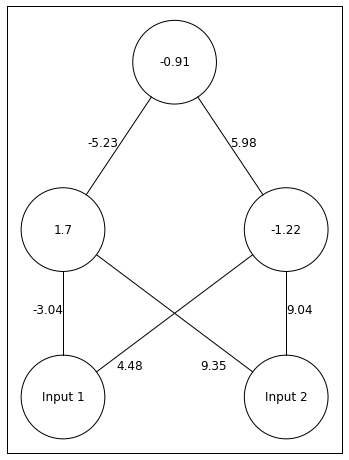

In [18]:
Weights_1 = Weight_Dict['Weights_1']
Weights_2 = Weight_Dict['Weights_2']

Weight_Dict = {'Weights_1':Weights_1,'Weights_2':Weights_2}

network = NeuralNetwork()
network.add_layer(2,['Input 1','Input 2'],
                  [[round(x,2) for x in Weight_Dict['Weights_1'][0][:2]],
                   [round(x,2) for x in Weight_Dict['Weights_1'][1][:2]]])
network.add_layer(2,[round(Weight_Dict['Weights_1'][0][2],2),round(Weight_Dict['Weights_1'][1][2],2)],
                  [round(x,2) for x in Weight_Dict['Weights_2'][:2]])
network.add_layer(1,[round(Weight_Dict['Weights_2'][2],2)])
network.draw()

This network was unable to push itself out of the local optima. While local optima are a problem, they're are a couple things we can do to avoid them. First, we should always train a network multiple times with different random weights in order to test for local optima. If the network continually finds local optima, then we can increase the learning rate. By increasing the learning rate, the network can escape local optima in some cases. This should be done with care though as too big of a learning rate can also prevent finding the global minima. 

Alright, that's it. Obviously the neural network behind [alpha go](https://en.wikipedia.org/wiki/AlphaGo) is much more complex than this one, but I would guess that while alpha go is much larger the basic computations underlying it are similar. 

Hopefully these posts have given you an idea for how neural networks function and why they're so cool!